0 
1 sign_ups
2 serves
3 servers
4 average_wait_time
5 average_serve_time
6 day
7 avgDayServeTime
8 loadInflux
9 daysAfterPrevAssnDue
10 daysUntilNextAssnDue
11 daysTilExam
12 weekNum
13 hourOfDay
14 monday
15 tuesday
16 wednesday
17 thursday
18 friday
19 saturday
20 sunday
21 morning
22 noon
23 afternoon
24 evening
25 L10daysAfterPrevAssnDue
26 L5daysAfterPrevAssnDue
27 L3daysAfterPrevAssnDue
28 L1daysAfterPrevAssnDue
29 L10daysUntilNextAssnDue
30 L5daysUntilNextAssnDue
31 L3daysUntilNextAssnDue
32 L1daysUntilNextAssnDue
33 L10daysTilExam
34 L5daysTilExam
35 L3daysTilExam
36 L1daysTilExam
37 isFirstOHWithinLastThreeHour
38 isFirstOHWithinLastSixHour
39 isLastOHWithinNextThreeHour
40 isLastOHWithinNextSixHour
41 NumStudents
42 InstructorRating
43 AvgHrsSpent
44 ProportionFrosh
45 ProportionGrads
46 ProportionPhDs
0 
1 sign_ups
2 serves
3 servers
4 average_wait_time
5 average_serve_time
6 day
7 avgDayServeTime
8 loadInflux
9 daysAfterPrevAssnDue
10 daysUntilNextAssnDue
11 daysTilExam
12

0 
1 sign_ups
2 serves
3 servers
4 average_wait_time
5 average_serve_time
6 day
7 avgDayServeTime
8 loadInflux
9 daysAfterPrevAssnDue
10 daysUntilNextAssnDue
11 daysTilExam
12 weekNum
13 hourOfDay
14 monday
15 tuesday
16 wednesday
17 thursday
18 friday
19 saturday
20 sunday
21 morning
22 noon
23 afternoon
24 evening
25 L10daysAfterPrevAssnDue
26 L5daysAfterPrevAssnDue
27 L3daysAfterPrevAssnDue
28 L1daysAfterPrevAssnDue
29 L10daysUntilNextAssnDue
30 L5daysUntilNextAssnDue
31 L3daysUntilNextAssnDue
32 L1daysUntilNextAssnDue
33 L10daysTilExam
34 L5daysTilExam
35 L3daysTilExam
36 L1daysTilExam
37 NumStudents
38 InstructorRating
39 AvgHrsSpent
40 ProportionFrosh
41 ProportionGrads
42 ProportionPhDs
43 index
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_35 (Dense)        

3201/3201 [==============================] - 0s 147us/step - loss: 1.4445 - mean_squared_error: 2.8890 - val_loss: 1.4702 - val_mean_squared_error: 2.9405
Epoch 41/1000
3201/3201 [==============================] - 0s 121us/step - loss: 1.4415 - mean_squared_error: 2.8831 - val_loss: 1.4731 - val_mean_squared_error: 2.9463
Epoch 42/1000
3201/3201 [==============================] - 0s 135us/step - loss: 1.4453 - mean_squared_error: 2.8905 - val_loss: 1.4789 - val_mean_squared_error: 2.9577
Epoch 43/1000
3201/3201 [==============================] - 0s 109us/step - loss: 1.4426 - mean_squared_error: 2.8851 - val_loss: 1.4874 - val_mean_squared_error: 2.9748
Epoch 44/1000
3201/3201 [==============================] - 0s 108us/step - loss: 1.4401 - mean_squared_error: 2.8802 - val_loss: 1.4734 - val_mean_squared_error: 2.9468
Epoch 45/1000
3201/3201 [==============================] - 0s 124us/step - loss: 1.4401 - mean_squared_error: 2.8802 - val_loss: 1.4699 - val_mean_squared_error: 2.9397


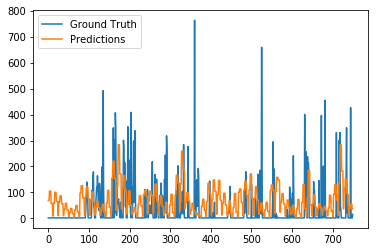

Test RMSE (log): 3.279
Test RMSE: 26.560


In [23]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping
from keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import csv
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
import pylab

seed = 221
np.random.seed(221)

SMOOTHING_LEN = 15

# see how i loop through train folder below in read_dataset

train_arr = ["./../Datasets/Regular/CS107Autumn2017dataset.csv", "./../Datasets/Regular/CS107Autumn2018dataset.csv", \
"./../Datasets/Regular/CS107Spring2018dataset.csv", "./../Datasets/Regular/CS107Winter2018dataset.csv", \
"./../Datasets/Regular/CS110Autumn2018dataset.csv", "./../Datasets/Regular/CS110Spring2018dataset.csv", \
"./../Datasets/Regular/CS161Autumn2017dataset.csv", "./../Datasets/Regular/CS161Spring2017dataset.csv", \
"./../Datasets/Regular/CS229Autumn2018dataset.csv", "./../Datasets/Regular/CS221Autumn2016dataset.csv", \
"./../Datasets/Regular/CS221Autumn2017dataset.csv"\
#"./../Datasets/Regular/CS224NWinter2018dataset.csv"
]
#test_arr = ["./../Datasets/Regular/CS107Spring2017dataset.csv"]
test_arr = ["./../Datasets/FullDataToPredict/FullCS224NWinter2017dataset.csv"]

# best: spring 2017
"""
LOSS Accuracies
MSE: 69.879
MAE: 62.643
Huber_0.1: 62.636
Huber_1: 62.607
Huber_10: 62.869
Huber_100: 68.836
DYY_Huber_0.3: 58.194
DYY_Huber_1: 58.01
DYY_Huber_10: 52.035
DYY_Huber_20: 52.669
DYY_Huber_30: 49.587
DYY_Huber_32: 47.03
DYY_Huber_40: 51.458
DYY_Huber_100: 65.448

"""


def read_dataset(arr):
    X, y = [], []
    for q, quarter in enumerate (arr):

        f = open(quarter, 'r')
        reader = csv.reader(f)
        raw_data = [row for row in reader]
        key = {k:v for k, v in enumerate(raw_data[0])}

        # removes 0, sign_ups, serves, servers (3), avg_wait_time, avg_serve_time, day, avg_day_serve_time, load_influx,
        # daysAfterprevdue, daysUntilNextdue, daysTillExam, hourOfDay, OH
        # add 3 below to exclude num_servers
        toRemove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 37, 38, 39, 40]
        for index in toRemove:
            del key[index]


        for i, d in enumerate(raw_data):
            if i == 0:
                continue	

            load_influx = float(d[8]) 
            y.append(load_influx)
            X.append([float(d[f]) for f in key.keys()])

        for i, j in enumerate(raw_data[0]):
            print (i, j)

    X, y = np.asarray(X), np.asarray(y).reshape((-1, 1))

    return X, y

def read_dataset_test(arr):
    X, y = [], []
    for q, quarter in enumerate (arr):

        f = open(quarter, 'r')
        reader = csv.reader(f)
        raw_data = [row for row in reader]
        key = {k:v for k, v in enumerate(raw_data[0])}

        # removes 0, sign_ups, serves, servers (3), avg_wait_time, avg_serve_time, avg_day_serve_time, load_influx,
        # daysAfterprevdue, daysUntilNextdue, daysTillExam, hourOfDay
        toRemove = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13,43]
        for index in toRemove:
            del key[index]

        for i, d in enumerate(raw_data):
            if i == 0:
                continue	

            load_influx = float(d[8]) 
            y.append(load_influx)
            X.append([float(d[f]) for f in key.keys()])

        for i, j in enumerate(raw_data[0]):
            print (i, j)


    X, y = np.asarray(X), np.asarray(y).reshape((-1, 1))
    return X, y

# 32 original
"""
20 - 54.2
22 - 54.67
15 - 56.2
18: 53.8
19: 54.3
"""

def sqHuber(yHat, y, delta=18):
    shrug_const = (.5 * delta**2 - (1/np.sqrt(2)) * delta)
    return K.tf.where(K.abs(y-yHat) < delta,.5*(y-yHat)**2 , K.sqrt(delta*(K.abs(y-yHat)-0.5*delta)) + shrug_const)

def Huber(yHat, y, delta=1):
    return K.tf.where(K.abs(y-yHat) < delta,.5*(y-yHat)**2 , delta*(K.abs(y-yHat)-0.5*delta))

def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=30, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()

    # adam = optimizers.Adam(lr=0.001, decay=0.01)
    model.compile(loss=sqHuber, optimizer='adam', metrics=['mse'])
#     model.compile(loss=keras.losses.mean_squared_error, optimizer='adam', metrics=['mse'])

    return model

def smooth(x,window_len=11,window='hanning'):


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y
	



if __name__ == "__main__":

    X_train, y_train = read_dataset(train_arr)
    X_test, y_test = read_dataset_test(test_arr)
    y_train_smooth, y_test_smooth = np.log(y_train + 1), np.log(y_test + 1)
#     y_train_smooth, y_test_smooth, X_train, X_test = y_train_smooth[:750], y_test_smooth[:750], X_train[:750,:], X_test[:750,:]
    y_test_smooth, X_test = y_test_smooth[:750], X_test[:750,:]

    #X_test, y_test = read_dataset(test_arr)
    #y_train_smooth = smooth(y_train.reshape((-1)),SMOOTHING_LEN)[:len(y_train)]
    #y_test_smooth = smooth(y_test.reshape((-1)),SMOOTHING_LEN)[:len(y_test)]

    # plt.plot(y_train, label = 'Load Influx Without Smoothing')
    # plt.plot(y_train_smooth, label='Load Influx, with smoothing')
    # pylab.legend(loc='upper left')
    # plt.show()

    # normalizes input
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # creates model
    model = create_model()

    # trains model
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, \
                          verbose=1, mode='auto')
    history = model.fit(X_train_scaled, y_train_smooth, epochs=1000, batch_size=64, callbacks = [earlystop], verbose=1, validation_split=0.05)

    # evaluates model
    score = model.evaluate(X_test_scaled, y_test_smooth, verbose=0)
    yhat = model.predict(X_test_scaled)

    plt.plot(np.exp(y_test_smooth), label = 'Ground Truth')
    plt.plot(np.exp(yhat), label='Predictions')
    pylab.legend(loc='upper left')
    plt.save
    plt.show()

    np.save("./../output/actualCS224NWinter2017dataset.csv.npy", yhat)
    rmse = np.sqrt(mean_squared_error(yhat, y_test_smooth))
    print('Test RMSE (log): %.3f' % rmse)
    print('Test RMSE: %.3f' % np.exp(rmse))

    # print('Test loss:', score[0])
    # print('load influx diff:', np.sqrt(score[0]))

#     # Plots training loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()

#     plt.plot(yhat, c='red')
#     plt.plot(y_test)
#     plt.show()

# 1. no dropout, 15, 8, 3, 1: 9553, 11504
# 2. no dropout, 15, 8, 1: 9413, 11428 --> so far best
# 2b. with dropout: 12259, 14018 --> nice graph.
# 2c. with batchnorm: 7375, 15611
# 3. no dropout, 15, 4, 1: 9683, 11778